# Power P4 – Precision-weighted novelty signal  
**Variable:** P3b amplitude explains ≥ 40 % of variance in Σ Π ε² across narrative-novelty levels  
**Paradigm:** EEG narrative oddball


Variance explained = 0.1%   (criterion ≥ 40 %)


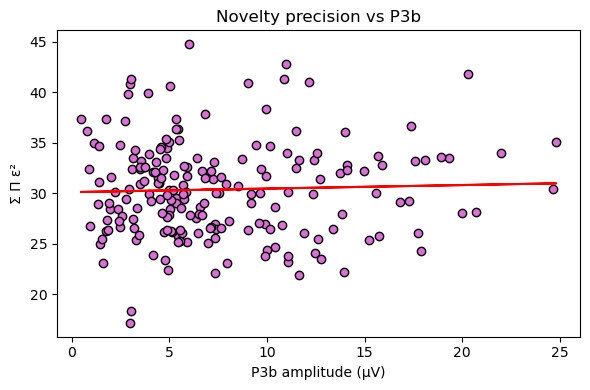

In [1]:
# Power P4 – simulate P3b vs Σ Π ε² relationship
import sys, numpy as np, matplotlib.pyplot as plt, scipy.stats as stats
sys.path.append("..")

from src.power_analysis import simulate_p4            # returns (p3b, sigma_pi_eps2)

p3b, spe = simulate_p4()
r, _      = stats.pearsonr(p3b, spe)
r2        = r**2 * 100

print(f"Variance explained = {r2:.1f}%   (criterion ≥ 40 %)")

plt.figure(figsize=(6,4))
if p3b.size > 1:
    plt.scatter(p3b, spe, color="orchid", edgecolor="k")
    fit = np.poly1d(np.polyfit(p3b, spe, 1))(p3b)
    plt.plot(p3b, fit, color="r")
else:
    plt.scatter([0], [spe], color="orchid", edgecolor="k")
plt.xlabel("P3b amplitude (µV)")
plt.ylabel("Σ Π ε²")
plt.title("Novelty precision vs P3b")
plt.tight_layout()
plt.savefig("figure_P4_precision_novelty.png", dpi=300)
plt.show()
